In [18]:
import pandas as pd
import torch

diabetes_df = pd.read_csv("../diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [20]:
import torch.nn as nn
import torch.nn.functional as F # functional has the activation functions

#create tensors from the data
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

In [21]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,
                 hidden1=20,hidden2=20,
                 out_features=2):
        super().__init__() 
        """
        super is a computed indirect reference
        which means that it isolates changes and
        makes sure the children in the layers of
        multiple inheritance are calling 
        the right parents
        """
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        #apply activation function
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [22]:
torch.manual_seed(42)

# create an instance of the model
ann = ANN_Model()

In [23]:
# loss function 
loss_function = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adadelta(ann.parameters(), lr = 0.01)

In [24]:
final_loss = []
n_epochs = 100
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad() #zeros the gradient before running backward propagation
    loss.backward() # working to minimize the loss function using backward propagation
    optimizer.step() # perform one optimization step each function



Epoch number: 1 with loss 1.601863980293274
Epoch number: 11 with loss 1.5473617315292358
Epoch number: 21 with loss 1.491814374923706
Epoch number: 31 with loss 1.4359487295150757
Epoch number: 41 with loss 1.3805038928985596
Epoch number: 51 with loss 1.3253813982009888
Epoch number: 61 with loss 1.271697759628296
Epoch number: 71 with loss 1.219709873199463
Epoch number: 81 with loss 1.1699328422546387
Epoch number: 91 with loss 1.1215368509292603


In [25]:
# predictions
y_pred = []

with torch.no_grad(): # this will decrease memory consumption
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 
        # returns the index with the max
        # element in each position set

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

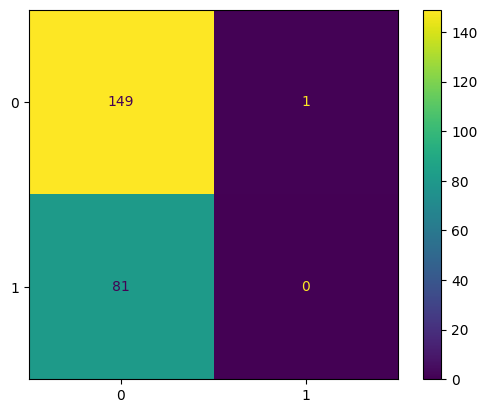

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Adam optimizer works by tracking 2 values, the average gradient and the gradient squared. I tried adadelta optimizer. Performed worse than Adam because it ended up predicting only zeros